# Part I - (Prosper Loan Data Exploration)
## by (Eze, Obinna Joshua Miguel)

## Introduction
> This document explores a dataset containing loan amount, loan status, borrower annual percentage rate and other variables for 113,937 loans.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Load dataset in a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# assessment of the data's nature and structure
print(loans.dtypes)
print(loans.shape)
pd.set_option("display.max_columns", len(loans.columns))
loans.head(10)

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# checking the column names for this dataframe
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
# Reduce the number of columns to those of interest to this analysis
selected_columns = ['ListingNumber','ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','EmploymentStatus', 'DebtToIncomeRatio','LoanOriginalAmount','MonthlyLoanPayment', 'IsBorrowerHomeowner', 'CurrentlyInGroup']
loans_to_del = loans.columns.difference(selected_columns)
loans_sub = loans.drop(columns = loans_to_del)

In [21]:
loans_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ListingNumber          113937 non-null  int64  
 1   ListingCreationDate    113937 non-null  object 
 2   Term                   113937 non-null  int64  
 3   LoanStatus             113937 non-null  object 
 4   BorrowerAPR            113912 non-null  float64
 5   ProsperRating (Alpha)  84853 non-null   object 
 6   Occupation             110349 non-null  object 
 7   EmploymentStatus       111682 non-null  object 
 8   IsBorrowerHomeowner    113937 non-null  bool   
 9   CurrentlyInGroup       113937 non-null  bool   
 10  DebtToIncomeRatio      105383 non-null  float64
 11  StatedMonthlyIncome    113937 non-null  float64
 12  LoanOriginalAmount     113937 non-null  int64  
 13  MonthlyLoanPayment     113937 non-null  float64
dtypes: bool(2), float64(4), int64(3), ob

In [5]:
loans_sub.rename(columns={'ProsperRating (Alpha)':'ProsperRating_Alpha'}, inplace=True)

In [266]:
# Checking for duplicates
pd.set_option("display.max_columns", len(loans_sub.columns))
loans_sub[loans_sub.duplicated()]

,ListingNumber,Term,LoanStatus,ListingCategory (numeric),BorrowerState,ClosedDate,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,ProsperRating (Alpha),Occupation,EmploymentStatus,TotalInquiries,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment,TotalTrades,Investors,IsBorrowerHomeowner,CurrentlyInGroup,LCreationDate,ListingCreationTime
9,1023355,36,Current,7,IL,NaN,0.07620,0.0629,3333.333333,AA,Food Service,Employed,6.0,0.25,10000,305.54,29.0,1,True,False,2013-12-02,10:43:39.117000
999,1055932,60,Current,1,MD,NaN,0.17710,0.1535,3750.000000,B,Other,Employed,5.0,0.35,10000,239.74,32.0,1,True,False,2013-12-18,14:25:17.053000
2539,1097584,60,Current,1,NJ,NaN,0.14528,0.1224,10833.333333,B,Police Officer/Correction Officer,Employed,5.0,0.18,35000,782.81,26.0,1,True,False,2014-01-11,07:50:08.037000
4942,927246,36,Current,7,MI,NaN,0.35356,0.3134,4583.333333,HR,Laborer,Employed,9.0,0.07,4000,172.76,31.0,40,True,False,2013-09-26,09:35:36.317000
5812,920397,36,Current,1,GA,NaN,0.24205,0.2045,4166.666667,C,NaN,Other,0.0,0.62,15000,560.90,34.0,1,True,False,2013-09-24,13:27:48.287000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,1158474,60,Current,18,CO,NaN,0.22063,0.1960,7666.666667,D,Other,Employed,2.0,0.15,14000,367.81,22.0,1,True,False,2014-01-23,14:33:25.967000
113636,904020,36,Current,1,WI,NaN,0.21290,0.1760,2500.000000,C,NaN,Other,2.0,0.20,4000,143.81,32.0,1,True,False,2013-09-17,11:44:43.177000
113733,1002326,60,Current,1,WI,NaN,0.20593,0.1819,4583.333333,B,Skilled Labor,Employed,1.0,0.42,10000,254.97,28.0,66,False,False,2013-11-07,14:26:31.317000
113773,1056749,36,Current,1,NJ,NaN,0.16324,0.1274,2720.833333,B,Other,Employed,7.0,0.36,10000,335.69,24.0,1,True,False,2013-12-06,05:43:13.830000


In [6]:
# now to drop any duplicates in the dataframe
loans_sub = loans_sub.drop_duplicates()
# Reset Indexes after dropping duplicates
loans_sub.reset_index(drop=True, inplace=True)
# Test to check all duplicates have been dropped
loans_sub.duplicated().sum()

0

In [7]:
# Convert the "ProsperRating" column from a plain object type into an ordered categorical type
ProsperRating_classes = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
PRclasses = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRating_classes)
loans_sub['ProsperRating_Alpha'] = loans_sub['ProsperRating_Alpha'].astype(PRclasses);

In [62]:
loans_sub.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [64]:
loans_sub.Term.unique()

array([36, 60, 12], dtype=int64)

### What is the structure of your dataset?

The data collection has 113,937 loans with a total of 81 variables, such as loan amount, loan status, borrower annual percentage rate (interest rate), current loan status, borrower income, and many more in the original dataset. There are several numeric variables, a few qualitative variable, 2 booleans and 1 categorical variable in the dataset extracted from the original dataset. The borrowerapr has the following levels:

0 ---> 7 <br>
BorrowerAPR: N/A, HR, E, D, C, B, A, AA

### What is/are the main feature(s) of interest in your dataset?

I am interested in the following features:
* Determining the factors that affects a loan's outcome status
* Determining the factors that affects a borrower's Annual Percentage Rate(APR) or interest rate
* Determine whether the original loan amount is used to categorize or classify loans

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the loan's outcome status will be impacted  by the employment status, borrowerrate, isborrowerhomeowner and the prosper rating. I presume that there will be a relationship between the borrower's APR, loan term, stated monthly income, IsBorrowerHomeOwner and employment status against the total loan amount. I also think the employment status, occupation, prosperrating will have an effect on the original loan amount.

## Univariate Exploration

Let's start off by looking at the loan amount variable and analyse the distribution


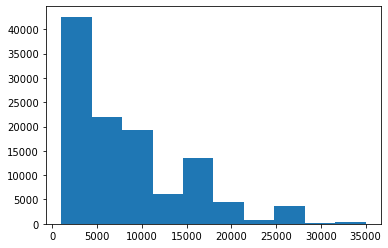

In [27]:
# univariate plot of original loan amount
plt.hist(data = loans_sub, x = 'LoanOriginalAmount');

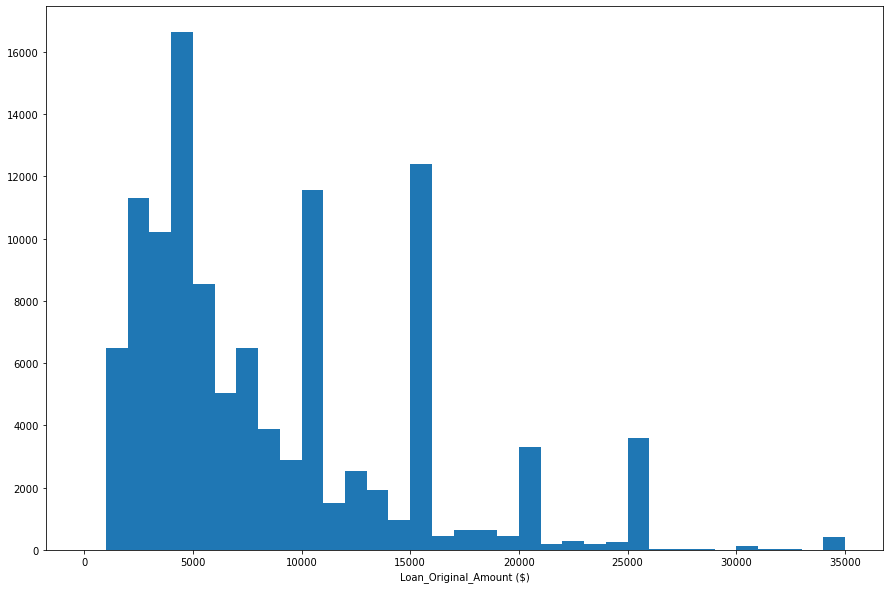

In [77]:
# Using bins to better represent the data
binsize = 1000
bins = np.arange(0, loans_sub['LoanOriginalAmount'].max()+binsize, binsize)a

plt.figure(figsize=[15, 10])
plt.hist(data = loans_sub, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan_Original_Amount ($)')
plt.show()

In [81]:
np.log10(loans_sub['LoanOriginalAmount'].describe())

count    5.053332
mean     3.919850
std      3.794976
min      3.000000
25%      3.602060
50%      3.799341
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

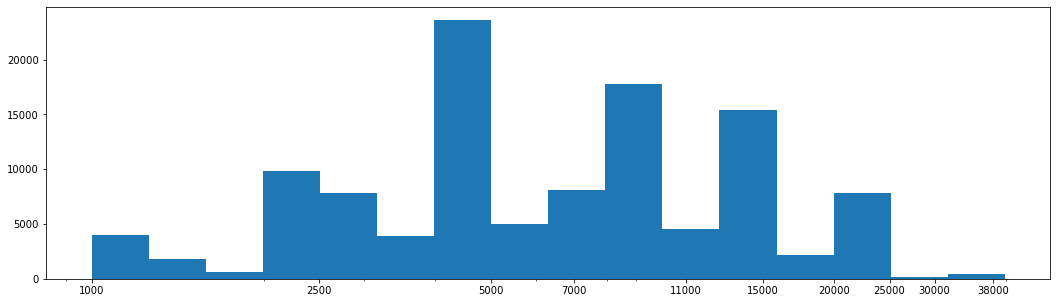

In [97]:
# Using log transform to represent the loan amount
plt.figure(figsize = [18,5])
bins = 10 ** np.arange(3.0, 4.55+0.1, 0.1)
ticks = [1000, 2500, 5000, 7000, 11000, 15000, 20000, 25000, 30000, 38000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=loans_sub, x='LoanOriginalAmount', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

## Observation
> The distribution when plotted without applying a log scale is skewed to the right and multimodal.

> For the most part the bigger the loan amount, the lesser the number of borrowers

#### Next, lets create a plot of the borrowers's annual perrcentage rate(APR)

(array([7.0000e+01, 8.4540e+03, 2.0901e+04, 2.6705e+04, 2.1540e+04,
        1.7281e+04, 1.5430e+04, 2.5980e+03, 5.8000e+01, 4.0000e+00]),
 array([0.00653 , 0.057106, 0.107682, 0.158258, 0.208834, 0.25941 ,
        0.309986, 0.360562, 0.411138, 0.461714, 0.51229 ]),
 <BarContainer object of 10 artists>)

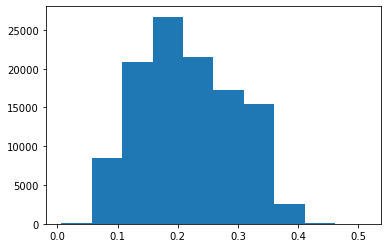

In [98]:
# univariate plot of Borrower's APR
plt.hist(data=loans_sub, x='BorrowerAPR')

In [99]:
loans_sub.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

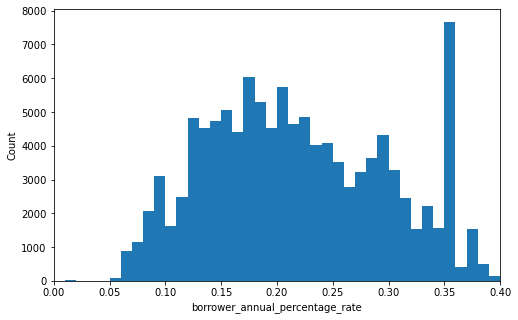

In [453]:
# examining further using smaller binsize
binsize = 0.01
bins = np.arange(0, loans_sub['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans_sub, x = 'BorrowerAPR', bins = bins)
plt.xlim([0,0.4])
plt.xlabel('borrower_annual_percentage_rate')
plt.ylabel('Count')
plt.show()

## Observation
> The borrower APR distribution is unimodal.

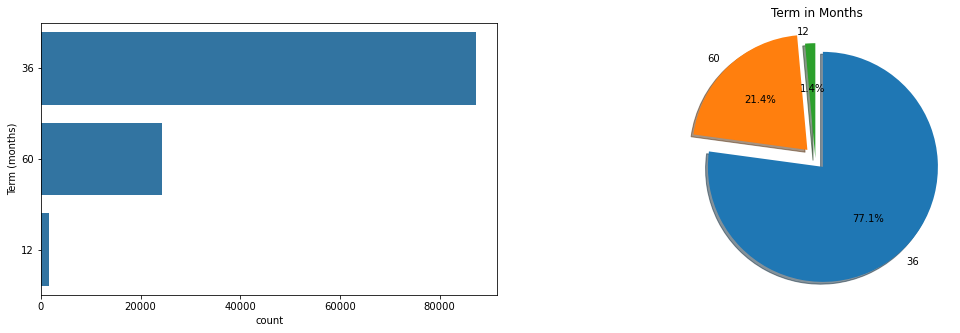

In [209]:
# I will make a countplot and pie chart of the term
# borrowers choose when listing for loans
plt.figure(figsize = [18,5])

plt.subplot(1,2,1)
Term_counts = loans_sub['Term'].value_counts()
Term_order = Term_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_sub, y='Term', color=base_color, order=Term_order)
plt.ylabel('Term (months)');

plt.subplot(1,2,2)
sorted_counts = loans_sub['Term'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', explode=[0.1,0.1,0], shadow=True, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Term in Months');

## Observation
> Loans for the term of 36months(3years) has the highest count, followed by 60months(5years) and the least count is for 12months(1year). Much more persons (87224 borrower) took or prefer a loan of 3year term, while a lesser number of persons(24228 borrower) took for 5year term and a far lesser number(1614 borrowers) took for 1year term.

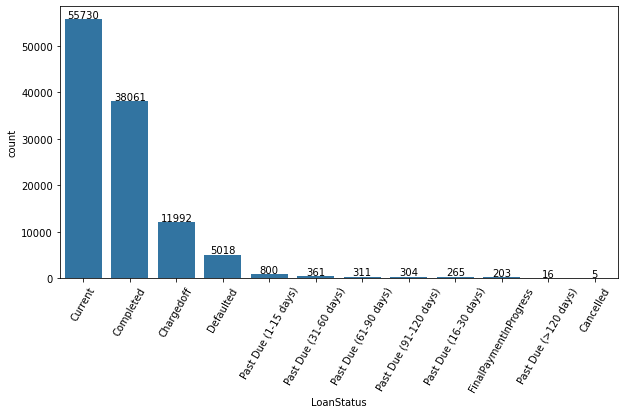

In [115]:
# now to create a countplot of the loan status of loans that were listed
plt.figure(figsize = [10,5])
status_counts = loans_sub['LoanStatus'].value_counts()
status_order = status_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_sub, x='LoanStatus', color=base_color, order=status_order)
plt.xticks(rotation=60)
for i in range (status_counts.shape[0]):
    count = status_counts[i]
    plt.text(i, count+2000, count, ha = 'center', va='top');

## Observation
> Within the period of 2005 to 2014, 33061 loans has been completed, 11992 were chargedoff, 5018 defaulted and below 3000 loans are past there due date. 5 loans were cancelled within this period and 55730 loans is currently running. We will be concentrating on completed and current loan status going forward

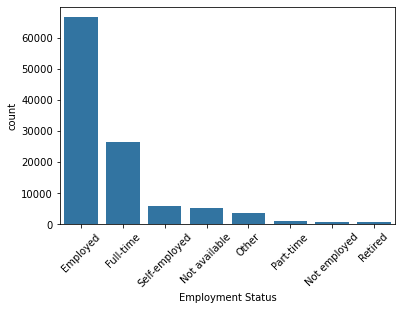

In [88]:
# create a plot of employment status of those who take loans
employmentstatus_counts = loans_sub['EmploymentStatus'].value_counts()
employmentstatus_order = employmentstatus_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_sub, x='EmploymentStatus', color=base_color, order=employmentstatus_order)
plt.xlabel('Employment Status')
plt.xticks(rotation=45);

## Observation
> As expected the highest number of those who request for and have accessed loans are employed, and the least number of those are the unemployed and retired

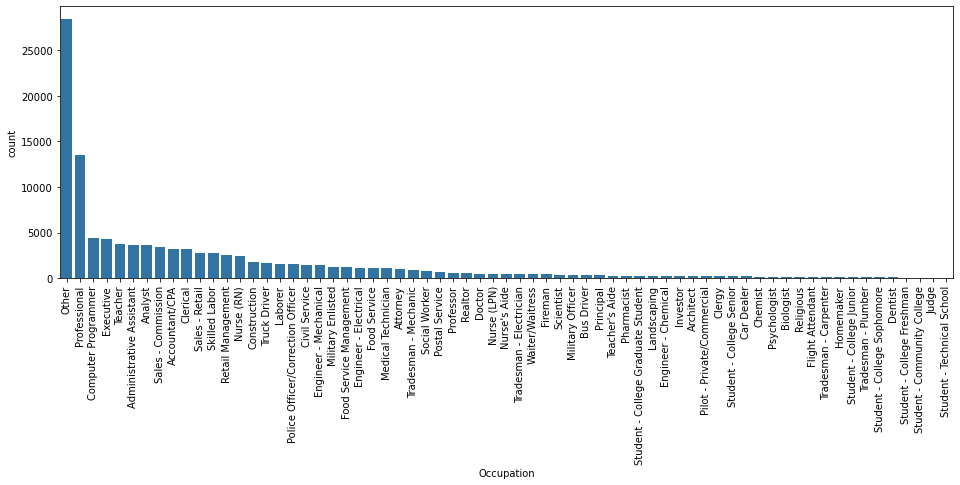

In [95]:
# check a count plot of occupation of those who take loans
plt.figure(figsize=[16,5])
employmentstatus_counts = loans_sub['Occupation'].value_counts()
employmentstatus_order = employmentstatus_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_sub, x='Occupation', color=base_color, order=employmentstatus_order)
plt.xlabel('Occupation')
plt.xticks(rotation=90);

## Observation

> As seen the highest number of listed borrowers are those who registered their occupation as other, followed by the professionals and the least are those registered as judge and student. 

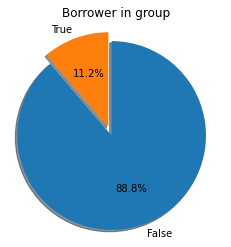

In [241]:
# investigate pie chart of borrowers who are in a group against those who are not
sorted_counts = loans_sub['CurrentlyInGroup'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Borrower in group');

## Observation
> The highest number of borrowers are those not in group with 88.12% of all the loans listed

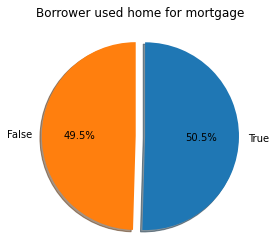

In [210]:
# create a pie chart of those who take loans using mortgage against those who don't have mortgage
sorted_counts = loans_sub['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', explode=[0,0.1], shadow=True, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Borrower used home for mortgage');

## Observation
> The number of borrowers who has a mortgage on their credit profile or provided documentation confirming they are home owners are slightly 1.5% greater than those who did not.

In [337]:
loans_sub.ListingCreationDate.max()

'2014-03-10 12:20:53.760000000'

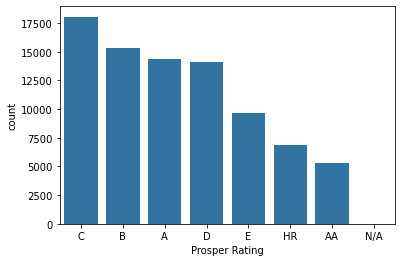

In [28]:
# investigate the Prosper rating after July 2009 so select dates greater than July 2009
# The rating is applicable to loans only within this period in this dataset
start_date = "2009-08-01"
end_date = "2014-03-10"
loans_dated = loans_sub.query("ListingCreationDate >= @start_date and ListingCreationDate <= @end_date")

# plot of ProsperRating of those who take loans
rating_counts = loans_dated['ProsperRating_Alpha'].value_counts()
rating_order = rating_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=loans_dated, x='ProsperRating_Alpha', color=base_color, order=rating_order)
plt.xlabel('Prosper Rating');

## Observation
> The number of borrowers with a prosper rating of C has the highest loan listing while the least loan listing is with a prosper rating of N/A.

In [573]:
loans_sub.StatedMonthlyIncome.describe()

count    1.130660e+05
mean     5.604801e+03
std      7.495589e+03
min      0.000000e+00
25%      3.199000e+03
50%      4.666000e+03
75%      6.824500e+03
max      1.750002e+06
Name: StatedMonthlyIncome, dtype: float64

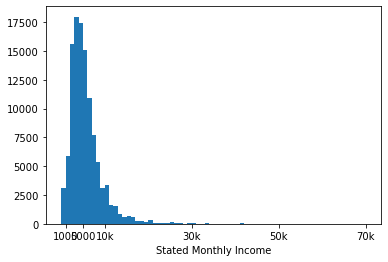

In [442]:
# Using bins to represent the stated monthly income
binsize = 1000
bins = np.arange(0, 70000+binsize, binsize)

plt.hist(data = loans_sub, x = 'StatedMonthlyIncome', bins = bins)
plt.xticks([1e+03, 5e+03, 10e+03, 30e+03, 50e+03, 70e+03], 
           [1000, 5000, '10k', '30k', '50k', '70k'])
plt.xlabel('Stated Monthly Income')
plt.show()

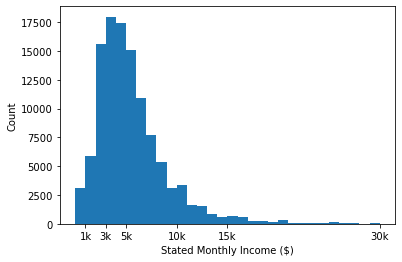

In [450]:
# Using bins to further remove outliers in the stated monthly income
binsize = 1000
bins = np.arange(0, 30000+binsize, binsize)

plt.hist(data = loans_sub, x = 'StatedMonthlyIncome', bins = bins)
plt.xticks([1e+03, 3e+03, 5e+03, 10e+03, 15e+03, 30e+03], 
           ['1k','3k', '5k', '10k', '15k', '30k'])
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Count')
plt.show()

## Observation
> The distribution for the stated monthly income is unimodal and skewed to the right. The highest income frequency falls between 3k and 5k

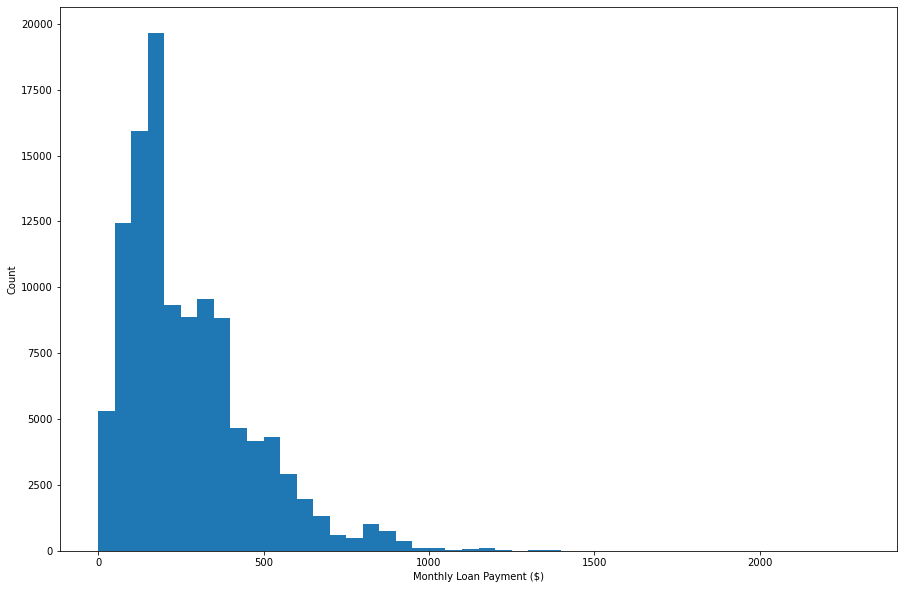

In [451]:
# create a plot of monthly loan payment
binsize = 50
bins = np.arange(0, loans_sub['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = loans_sub, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Count')
plt.show();

## Observation
> The distribution for the monthly loan payment is unimodal and skewed to the right. As the amount to pay increases monthly, the frequency or count of listed loans reduces

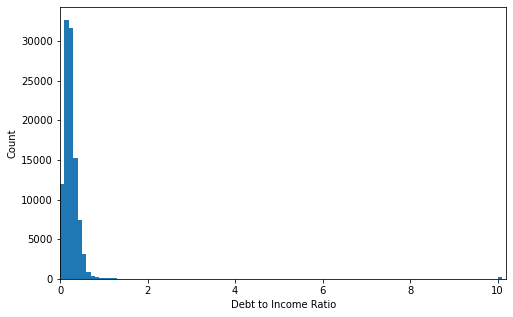

In [452]:
# plotting Debt to income ratio on a scale including the highest limit of 10.01
binsize = 0.1
bins = np.arange(0, loans_sub['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans_sub, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim([0,10.2])
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.show()

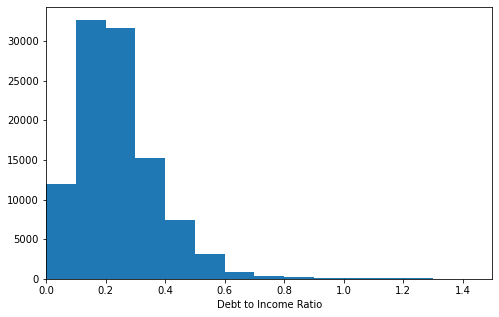

In [372]:
# now to limit the debt to income ratio maximum since clearly beyond a ratio of 2, an outlier lies around a ratio of 10
binsize = 0.1
bins = np.arange(0, loans_sub['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans_sub, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim([0,1.5])
plt.xlabel('Debt to Income Ratio')
plt.show()

## Observation
> The distribution for the debt to income ratio is unimodal and skewed to the right.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The debt to income ratio had an outlier lies around a ratio of 10. I had to set an appropriate limit to the debt to income ratio maximum so as to better represent the data. The distribution for the debt to income ratio is unimodal and skewed to the right. The distribution for the monthly loan payment is unimodal and skewed to the right. As the amount to pay increases monthly, the frequency or count of listed loans reduces. I used bins to further remove outliers in the stated monthly income and found the distribution to be unimodal and skewed to the right with the highest income frequenc between 3k and 5k. I used a smaller binsize on the borrowerapr also to better examine the data. I carried out a log transform on the loan original amount. The distribution is skewed to the right and interestingly the bigger the loan amount, the lesser the number of borrowers 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no data for prosper rating alpha before 1 August 2009 as stated in the variable definition file. In other to investigate the Prosper rating after July 2009 i had to specify part of the dataframe having dates greater than July 2009.


## Bivariate Exploration

> I want to start by examining the loans for completed and current loan status against isborrowerhomeowner, currentlyingroup and term

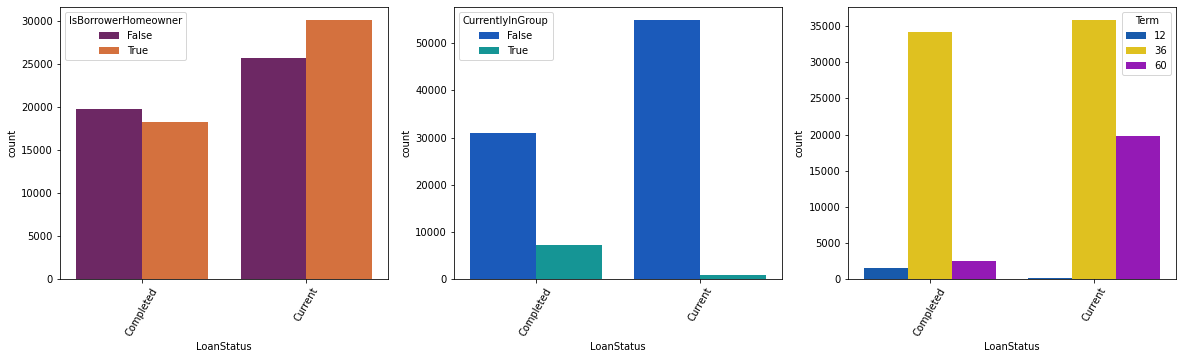

In [16]:
# Let's zoom in on the loan status looking at completed and current loans since the data for the other status are minimal.
loanstatus_sub=loans_sub[loans_sub['LoanStatus'].isin(['Completed','Current'])]
plt.figure(figsize = [20, 5])

# subplot 1: LoanStatus vs. IsBorrowerHomeowner
ax = plt.subplot(1, 3, 1)
sb.countplot(data = loanstatus_sub, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'inferno')
plt.xticks(rotation = 60)

# subplot 2: LoanStatus vs. CurrentlyInGroup
ax = plt.subplot(1, 3, 2)
sb.countplot(data = loanstatus_sub, x = 'LoanStatus', hue = 'CurrentlyInGroup', palette = 'winter')
plt.xticks(rotation = 60)

# subplot 3: LoanStatus vs. Term
ax = plt.subplot(1, 3, 3)
sb.countplot(data = loanstatus_sub, x = 'LoanStatus', hue = 'Term', palette = 'prism')
plt.xticks(rotation=60)

plt.show()

## Observation
> More numbers of borrowers who have no mortgage completed there loans and far more number of borrowers who are not in a group completed there loans. Also, a far larger percentage of borrowers with a loan term of 36 months completed there loans

> Similarly a far larger percentage of borrowers who are not in a group have current loan status while borrowers with a 12 month term has far more current loan status than other terms

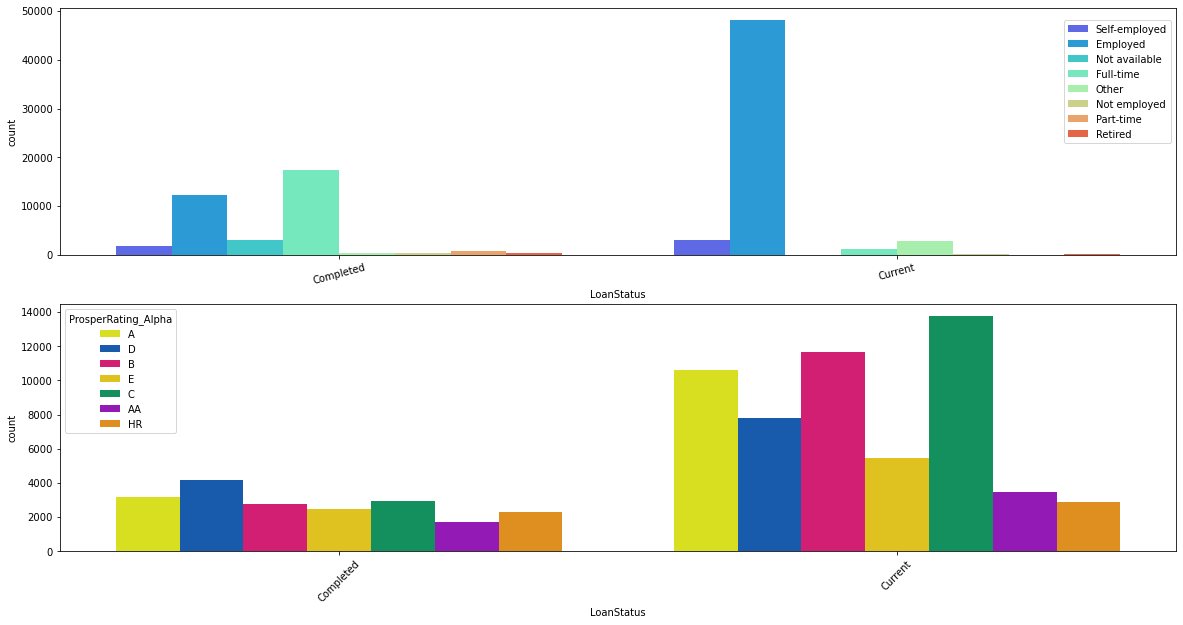

In [99]:
# now to look at loan status vs employment status and prosper rating

plt.figure(figsize=[20,10])

# subplot 1: Loan status vs Employment status
plt.subplot(2, 1, 1)
sb.countplot(data = loanstatus_sub, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'rainbow')
plt.xticks(rotation=15)
plt.legend(loc = 5, bbox_to_anchor = (1.0, 0.7))

# subplot 2: Loan status vs Prosper rating alpha
plt.subplot(2, 1, 2)
sb.countplot(data = loanstatus_sub, x = 'LoanStatus', hue = 'ProsperRating_Alpha', palette = 'prism')
plt.xticks(rotation=45)
plt.legend(loc = 2, ncol = 1, title='ProsperRating_Alpha');

## Observation
> As expected employed borrowers have the highest completed and current status.

> For the prosper rating, a rating of D=4 has the highest number of completed loan status while a rating of C=5 has the highest number of current loan status

In [27]:
# Now to look at the pairwise correlations present between numeric features in the data.
numeric_variables = ['BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Term']

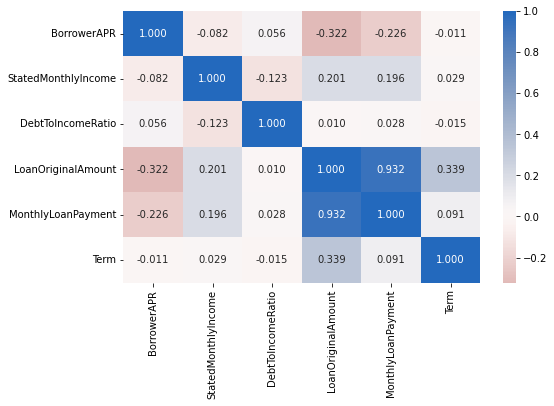

In [28]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans_sub[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

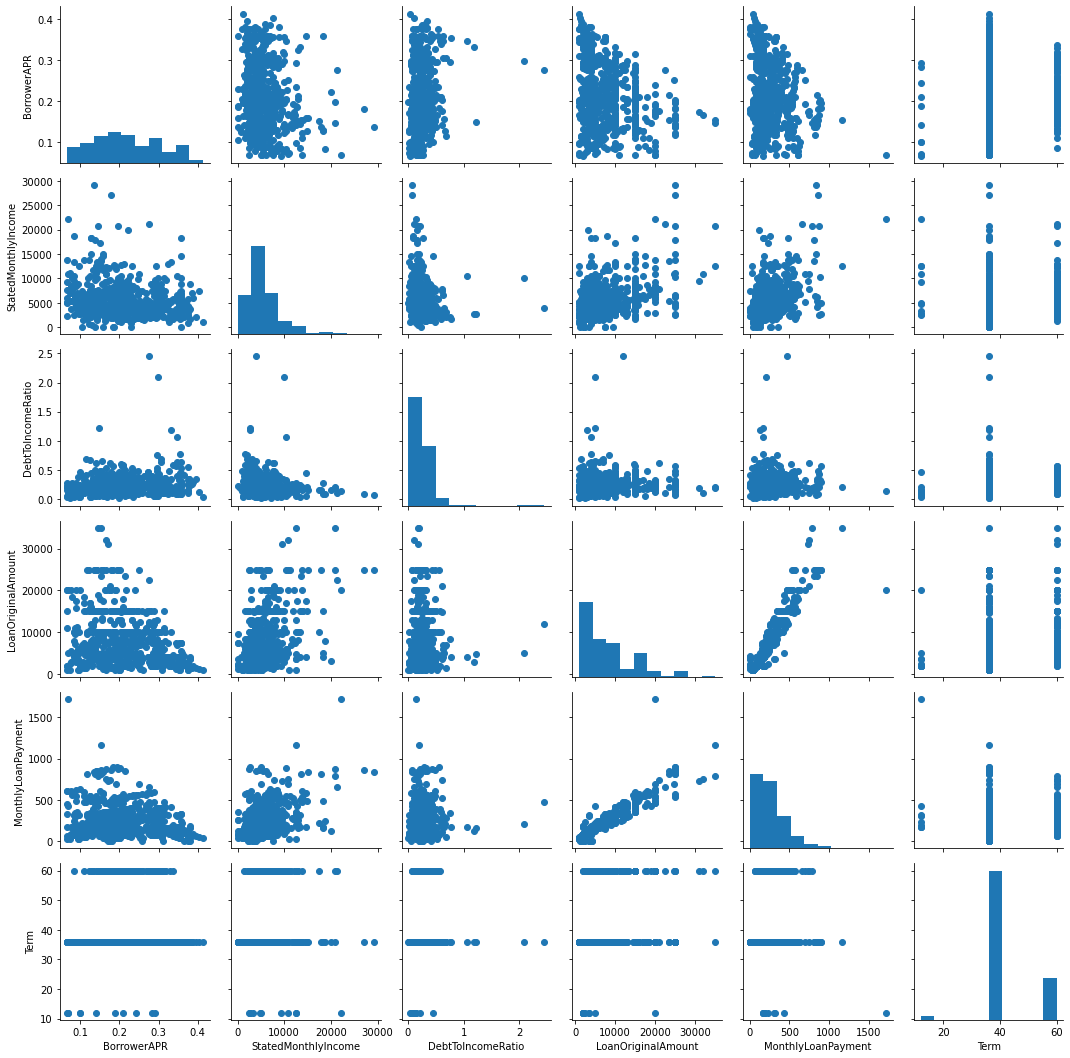

In [29]:
# A plot matrix of 600 loans sample so that the scatter plots are clearer and render faster
samples = np.random.choice(loans_sub.shape[0], 600, replace = False)
loans_sub_samp = loans_sub.loc[samples,:]

g = sb.PairGrid(data = loans_sub_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 10)
g.map_offdiag(plt.scatter);

## Observation
> There is a positive and significant correlation between monthly loan payment and the loan original amount but again that should be expected

> There is only a weak positive correlation between the stated monthly income and the loan original amount as indicated in the heatmap above.

> There is also a below average negative correlation between the borrower's APR against the loan original amount. This will imply the higher the loan original amount, the lower the annual interest rate and vice versa

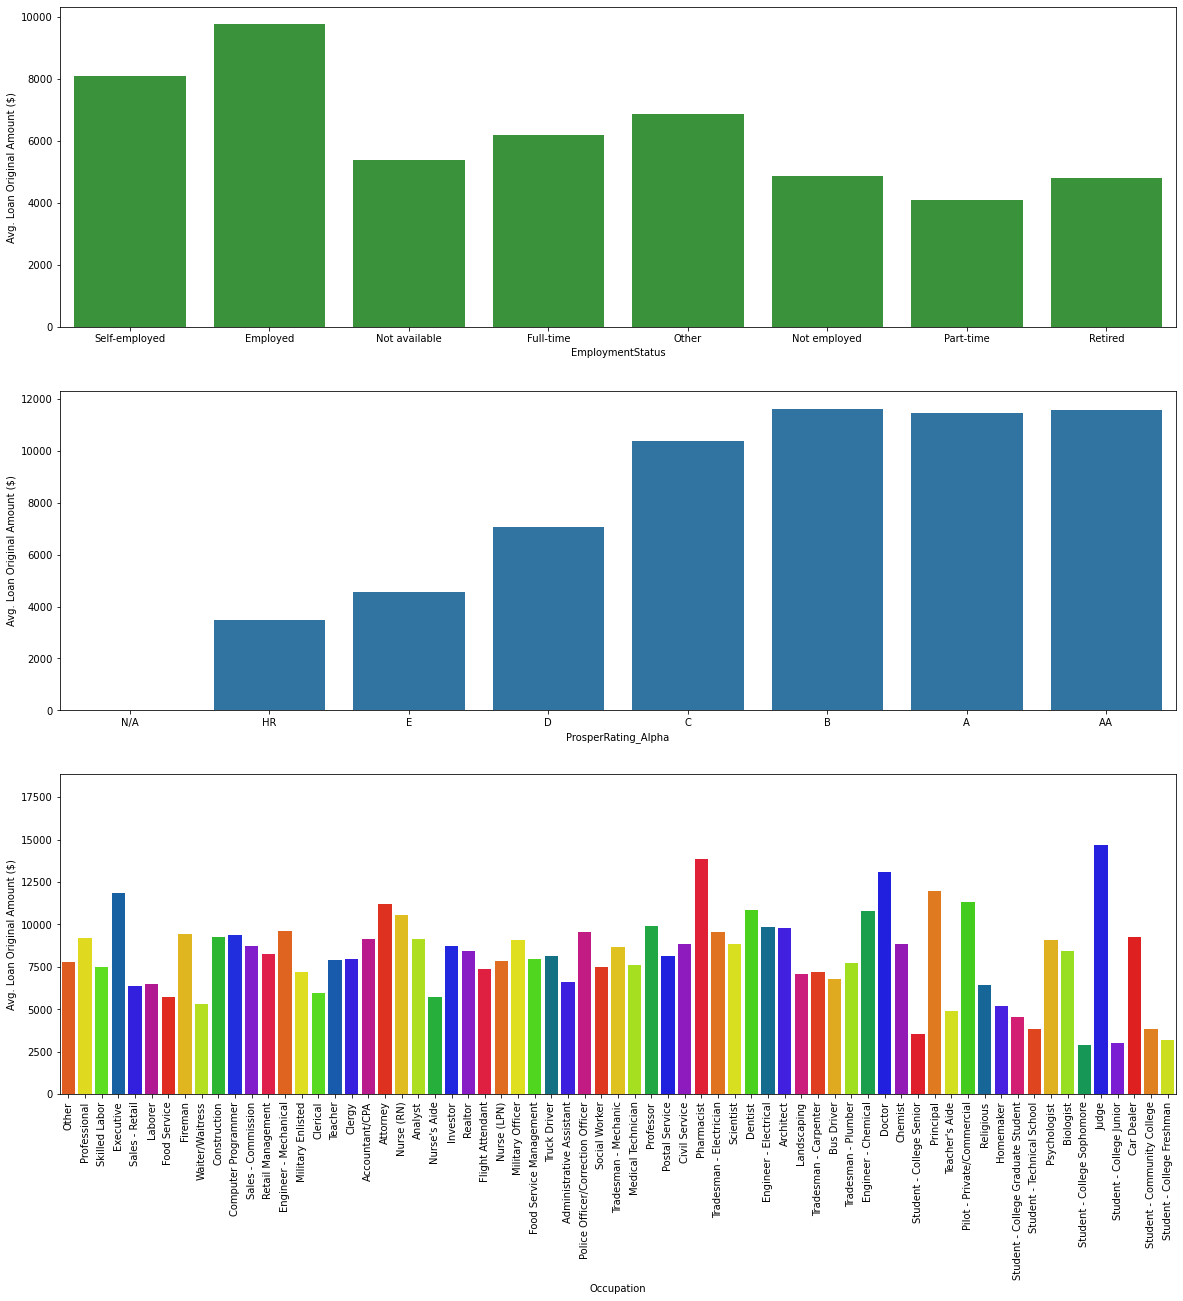

In [13]:
# Create barplots of average loan original amount vs. employment status, occupation, prosperrating
plt.figure(figsize = [20,20])

ticks = [1000, 2500, 5000, 7000, 11000, 15000, 20000, 25000, 30000, 38000]
labels = ['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels);

# subplot 1: employment status vs loan original amount
plt.subplot(3,1,1)
sb.barplot(data=loans_sub, x='EmploymentStatus', y='LoanOriginalAmount', color=sb.color_palette()[2], errwidth=0)
plt.ylabel('Avg. Loan Original Amount ($)')

# subplot 2: prosper rating alpha vs loan original amount
plt.subplot(3,1,2)
sb.barplot(data=loans_sub, x='ProsperRating_Alpha', y='LoanOriginalAmount', color=sb.color_palette()[0], errwidth=0)
plt.ylabel('Avg. Loan Original Amount ($)')

# subplot 3: occupation vs loan original amount
plt.subplot(3,1,3)
sb.barplot(data=loans_sub, x='Occupation', y='LoanOriginalAmount', palette = 'prism', errwidth=0)
plt.ylabel('Avg. Loan Original Amount ($)')
plt.xticks(rotation=90);

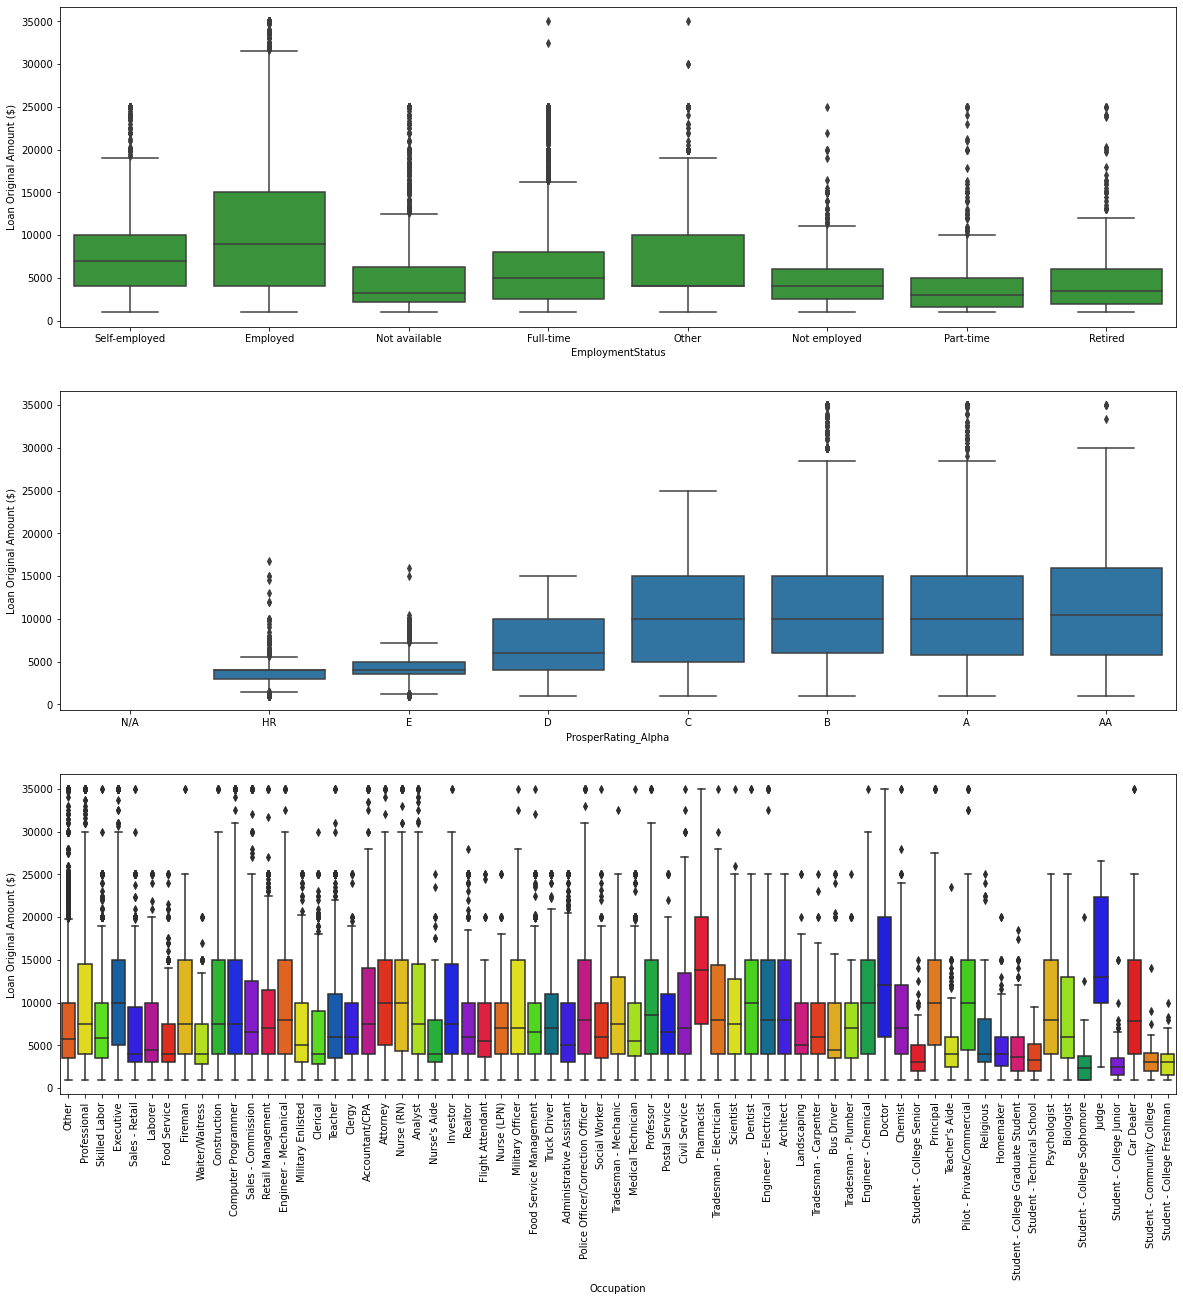

In [14]:
# make boxplots of loan original amount vs. employment status, occupation, prosperrating
plt.figure(figsize = [20,20])
ticks = [1000, 2500, 5000, 7000, 11000, 15000, 20000, 25000, 30000, 38000]
labels = ['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels)
# subplot 1: employment status vs loan original amount
plt.subplot(3,1,1)
sb.boxplot(data=loans_sub, x='EmploymentStatus', y='LoanOriginalAmount', color=sb.color_palette()[2])
plt.ylabel('Loan Original Amount ($)')

# subplot 2: prosper rating alpha vs loan original amount
plt.subplot(3,1,2)
sb.boxplot(data=loans_sub, x='ProsperRating_Alpha', y='LoanOriginalAmount', color=sb.color_palette()[0])
plt.ylabel('Loan Original Amount ($)')

# subplot 3: occupation vs loan original amount
plt.subplot(3,1,3)
sb.boxplot(data=loans_sub, x='Occupation', y='LoanOriginalAmount', palette = 'prism')
plt.ylabel('Loan Original Amount ($)')
plt.xticks(rotation=90);

## Observation
> Those with an employment status of employed has the highest average  and actual loan original amount. This was also seen in the univariate analysis

> There is also a close matching between the prosper rating and the loan original amount. The rating was created from AA - HR, AA being a rating of 7 has the highest average and actual loan original amount and HR being the lowest rating of 1 has the lowest average and actual loan original amount

> Also seen is that occupations with the highest average and actual loan original amount are amongst professionals, starting with Judges, Pharmacist, Doctors and so on. This is interesting because the Judge occupation as seen in the univariate analysis had the second to lowest count of listed borrowers, only above the student occupation. Yet the borrowed the highest loan and has the highest average of all loans they took. Those with the lowest average original loan amount are students.

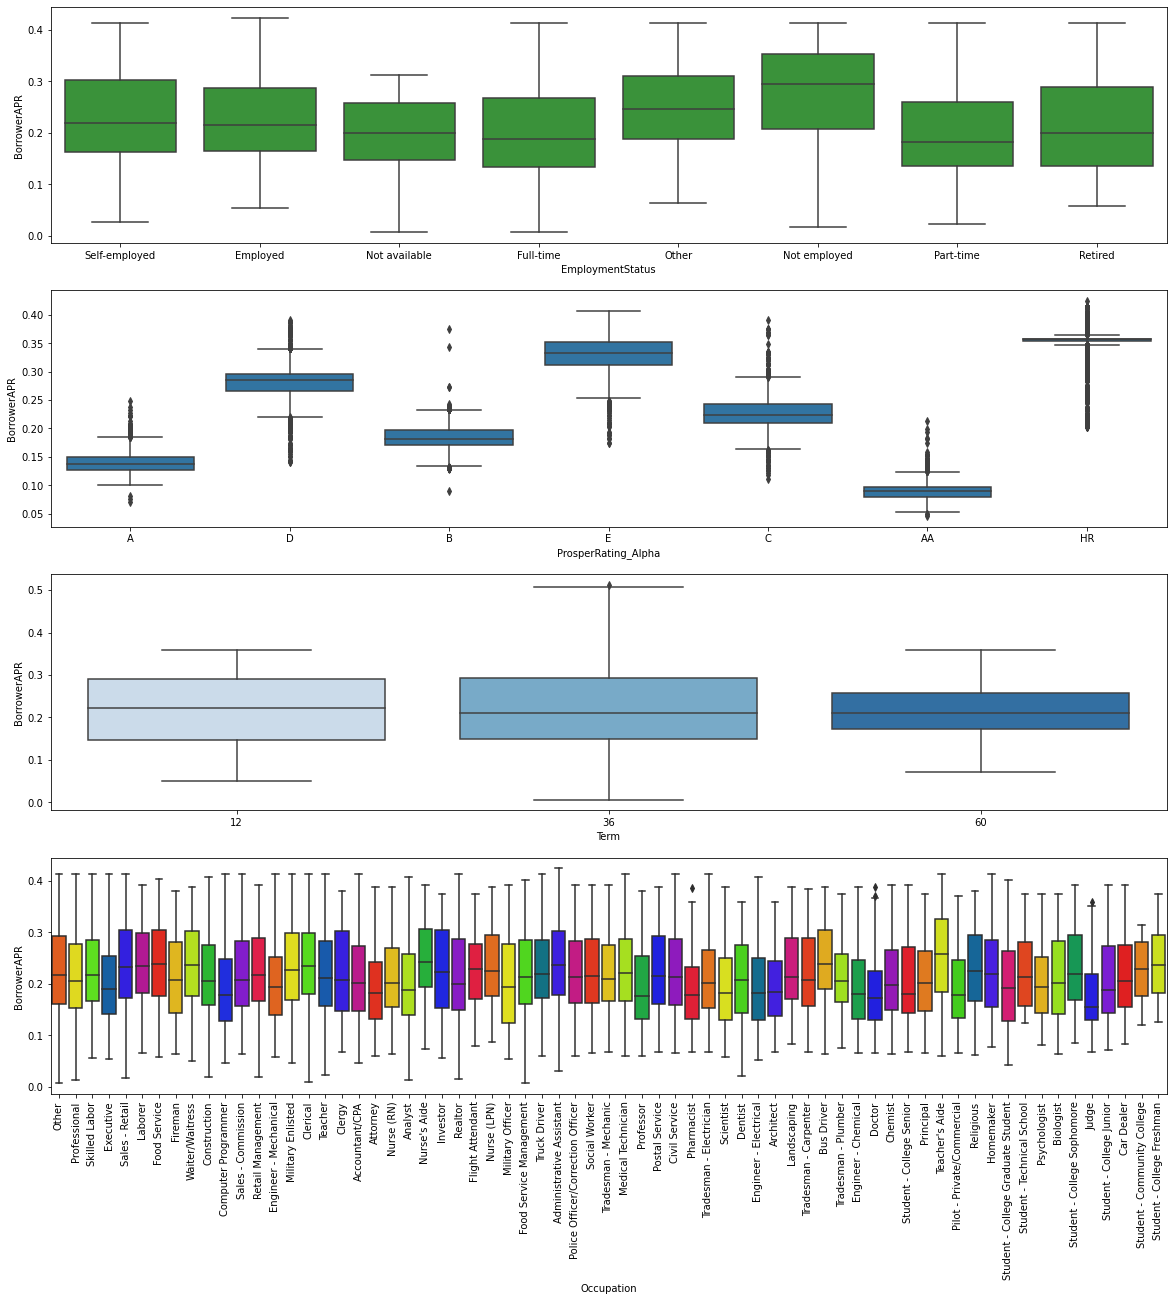

In [102]:
# examining boxplots of Borrower APR vs. employment status, prosperrating, Term
plt.figure(figsize = [20,20])

# subplot 1: employment status vs borrower apr
plt.subplot(4,1,1)
sb.boxplot(data=loans_sub, x='EmploymentStatus', y='BorrowerAPR', color=sb.color_palette()[2])
plt.ylabel('BorrowerAPR')

# subplot 2: prosper rating alpha vs borrower apr
plt.subplot(4,1,2)
sb.boxplot(data=loans_sub, x='ProsperRating_Alpha', y='BorrowerAPR', color=sb.color_palette()[0])
plt.ylabel('BorrowerAPR')

# subplot 3: term vs borrower apr
plt.subplot(4,1,3)
sb.boxplot(data=loans_sub, x='Term', y='BorrowerAPR', palette = 'Blues')
plt.ylabel('BorrowerAPR');

# subplot 4: occupation vs borrower apr
plt.subplot(4,1,4)
sb.boxplot(data=loans_sub, x='Occupation', y='BorrowerAPR', palette = 'prism')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=90);

## Observation

> The prosper loan charges more annual percentage rate or interest rate on the unemployed

> The 12 month term has the highest interest rate in average while the 36 month loan term has the lowest interest rate

> As seen in the plot of borrower's APR against occupation, the Judge occupation has the least borrower apr. It appears the higher the loan amount the smaller the borrower apr

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> On the employment status, the employed had the highest average  and actual loan original amount. The prosper rating alphas which is ranked from AA - HR, AA being a rating of 7 had the highest average and actual loan original amount and HR being the lowest rating of 1 has the lowest average and actual loan original amount.
> There is a positive and significant correlation between monthly loan payment and the loan original amount but again that should be expected. There was only a weak positive correlation between the stated monthly income and the loan original amount as indicated in the heatmap above.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I carried out some investigations of some qualitative variable against the borrowerapr and found the following:

The prosper loan charges more annual percentage rate or interest rate on the unemployed. The 12 month term had the highest interest rate in average while the 36 month loan term had the lowest interest rate.

As seen in the plot of borrower's APR against occupation, the Judge occupation had the least borrower apr. It appears the higher the loan amount the smaller the borrower apr


## Multivariate Exploration

I will explore the loan original amount against other variables of interest and then bring in the loan status to compare with other variables too

C:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


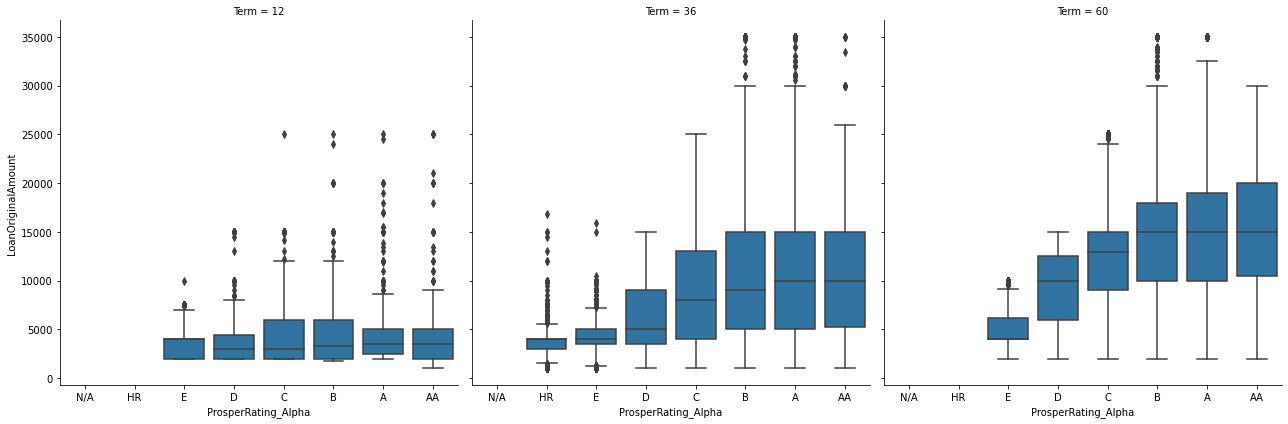

In [9]:
# Make a plot of the loan original amount vs prosper rating and the term
g = sb.FacetGrid(data = loans_sub, col = 'Term', height = 6)
g.map(sb.boxplot, 'ProsperRating_Alpha', 'LoanOriginalAmount');

## Observation
> previously in the bivariate plot we found that borrowers with a 12 month term had far more current loan status than other terms. In addition, here in this multivariate plot we can see that as the term increases from 12-36-60, so too does the amount given as loan to the borrowers. Interesting the prosper rating alpha stays true only for the term of 60 with the highest loan amount being for AA and the lowest for E. 

C:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


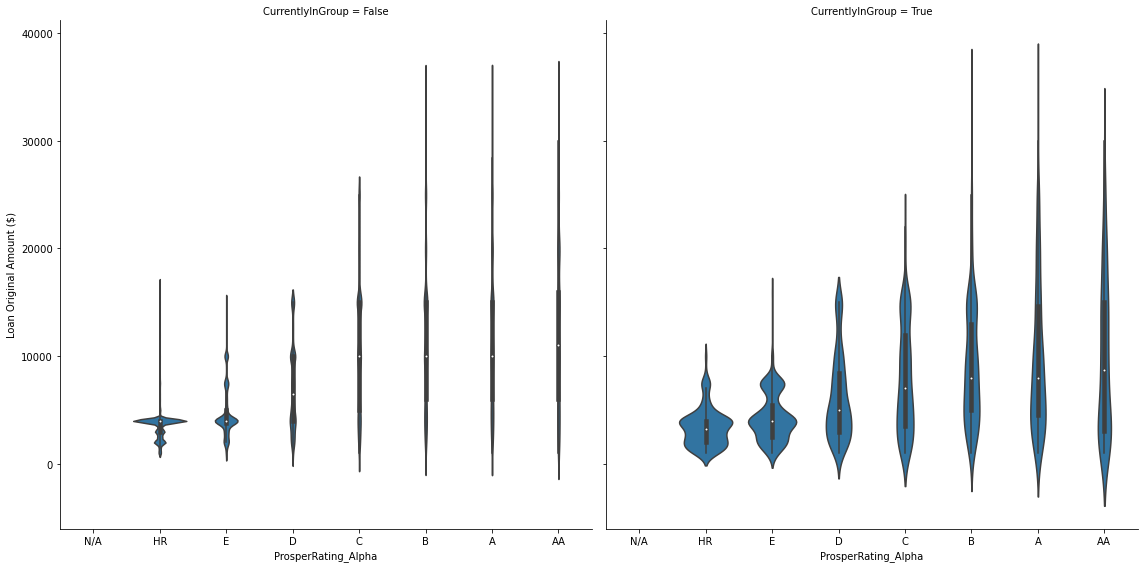

In [53]:
#Now make a plot of the loan original amount vs prosper rating and borrower currently in group
g = sb.FacetGrid(data = loans_sub, col = 'CurrentlyInGroup', height = 8)
g.map(sb.violinplot, 'ProsperRating_Alpha', 'LoanOriginalAmount')
g.set_ylabels( 'Loan Original Amount ($)');

C:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


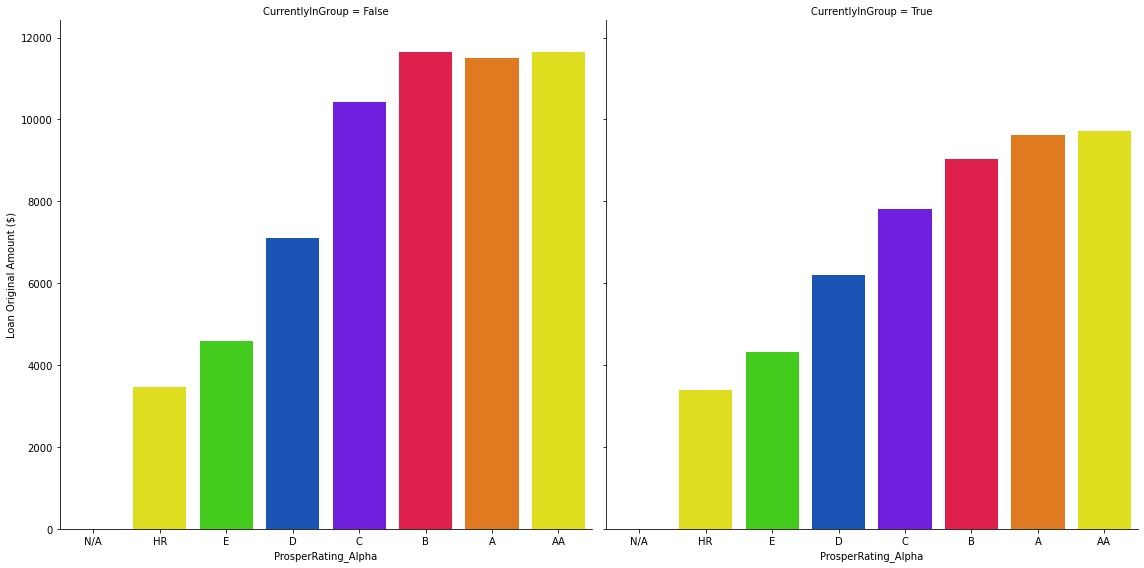

In [52]:
# Compare same variables above against the average loan amount
g = sb.FacetGrid(data = loans_sub, col = 'CurrentlyInGroup', height = 8)
g.map(sb.barplot, 'ProsperRating_Alpha', 'LoanOriginalAmount', palette='prism', errwidth = 0)
g.set_ylabels( ' Avg. Loan Original Amount ($)');

## Observation

> Previously in the univariate analysis we discovered that the highest number of borrowers are those not in a group. However from this analysis we can see those not in a group also has the highest number of average loan original amount and likewise the ranking follows the alpha rating from highest to lowest (AA-HR). The ranking follows the rating precisely for those in a group, corresponding to the the loan original amount from highest to lowest likewise

> Contrastingly from the violin plot, the number of borrowers thins out as the loan original amount.

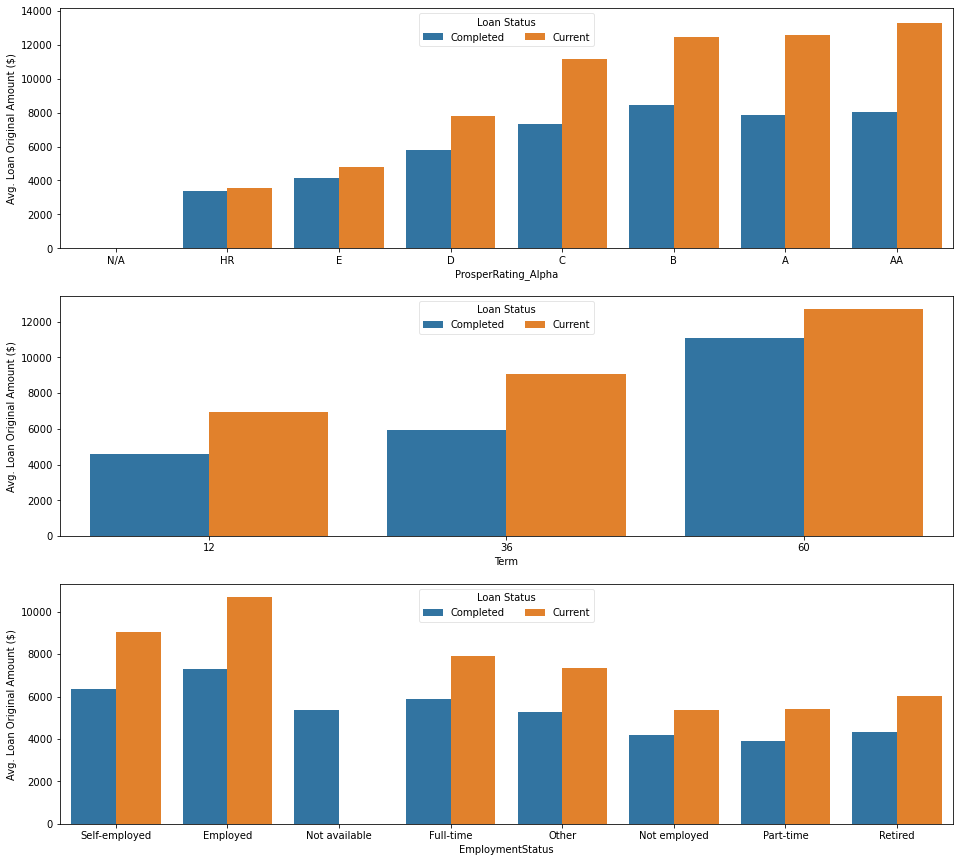

In [18]:
# Plotting to check loan status vs loan original amount and prosper rating, 
# particulary for a sub dataframe of completed and current loan status as used previously

plt.figure(figsize=[16,15])
ticks = [1000, 2500, 5000, 7000, 11000, 15000, 20000, 25000, 30000, 38000]
labels = ['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels);
# subplot 1: Prosper rating vs loan status and loan original amount
plt.subplot(3, 1, 1)
ax= sb.barplot(data=loanstatus_sub, x='ProsperRating_Alpha', y='LoanOriginalAmount', hue= 'LoanStatus', errwidth=0);
plt.ylabel('Avg. Loan Original Amount ($)')
ax.legend(loc = 9, framealpha = 0.5, ncol= 2, title='Loan Status')

# subplot 2: Term vs loan status and loan original amount
plt.subplot(3, 1, 2)
ax= sb.barplot(data=loanstatus_sub, x='Term', y='LoanOriginalAmount', hue= 'LoanStatus', errwidth=0);
plt.ylabel('Avg. Loan Original Amount ($)')
ax.legend(loc = 9, framealpha = 0.5, ncol= 2, title='Loan Status')

# subplot 3: Employment status vs loan status and loan original amount
plt.subplot(3, 1, 3)
ax= sb.barplot(data=loanstatus_sub, x='EmploymentStatus', y='LoanOriginalAmount', hue= 'LoanStatus', errwidth=0);
plt.ylabel('Avg. Loan Original Amount ($)')
ax.legend(loc = 9, framealpha = 0.5, ncol= 2, title='Loan Status')
plt.show()

## Observation

> As seen the prosper rating is valid as it corresponds to borrowers who receive equivalent loan amounts and as seen frequency or count of the completed and current loan status diminishes as the prosper rating drops from AA to HR and as the Loan original amount drops too.

> The loan status whether completed or current has a higher average loan original amount as the term increases.

> The employed completed more of their loans and with a larger average loan original amount. They also have more current loans at a larger average loan original amount. The part-time has the least completed loans at the lowest average loan original amount.

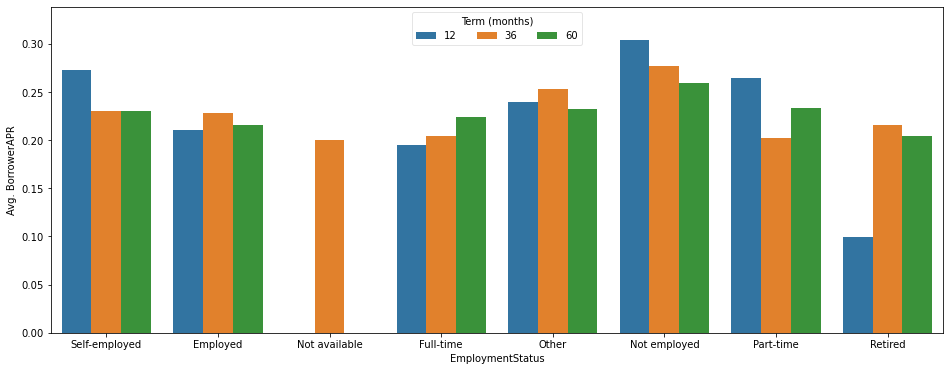

In [10]:
# plot average borrower APR against the term and employment status

plt.figure(figsize=[16,6])

ax= sb.barplot(data=loans_sub, x='EmploymentStatus', y='BorrowerAPR', hue= 'Term', errwidth=0);
plt.ylabel('Avg. BorrowerAPR')
ax.legend(loc = 9, framealpha = 0.5, ncol= 3, title='Term (months)');

## Observation

> As earlier observed in the bivariate exploration and as seen here the unemployed has the highest average annual percentage rate for all the terms of 12, 36 and 60 months. The lowest average interest rate for the term of 12 and 60 months are the retired, while for the lowest for 36 months are the unknown and unavailable employment status.

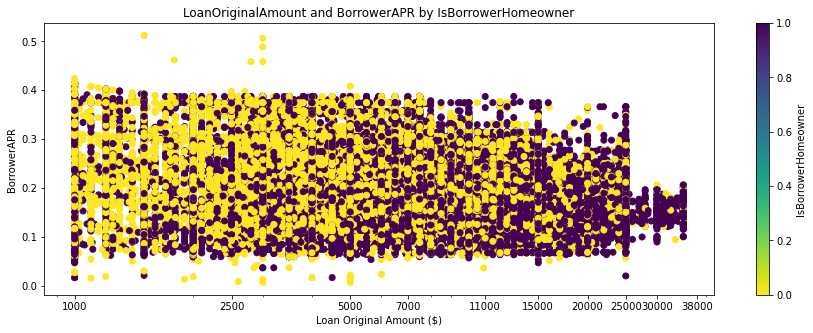

In [19]:
# multivariate plot of Loan Original Amount by BorrowerAPR, and IsBorrowerHomeowner
plt.figure(figsize = [15,5])
ticks = [1000, 2500, 5000, 7000, 11000, 15000, 20000, 25000, 30000, 38000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);
plt.scatter(data = loans_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', c = 'IsBorrowerHomeowner',
            cmap = 'viridis_r')
plt.title('LoanOriginalAmount and BorrowerAPR by IsBorrowerHomeowner')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('BorrowerAPR')
plt.colorbar(label='IsBorrowerHomeowner');

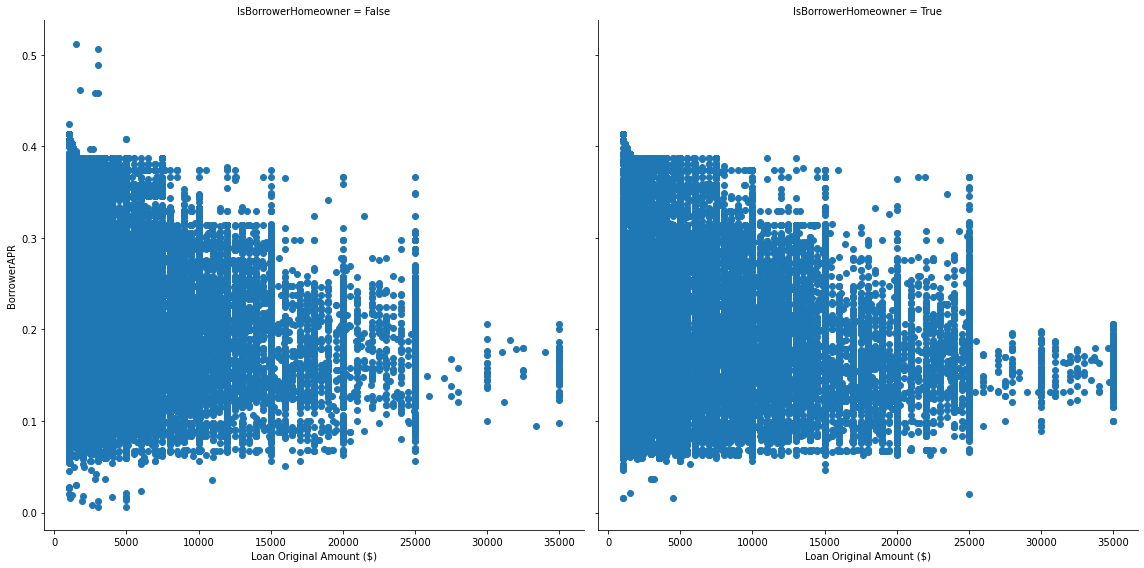

In [48]:
# make a scatter plot of Loan Original Amount by BorrowerAPR, and IsBorrowerHomeowner
g = sb.FacetGrid(data = loans_sub, col = 'IsBorrowerHomeowner', col_wrap = 2, height=8)
g.map(plt.scatter,'LoanOriginalAmount', 'BorrowerAPR')
g.set_xlabels( 'Loan Original Amount ($)');

## Observation

> The Borrower annual percentage rate is usually around the 0.1 to 0.2 range for larger loans above 25000 dollars and a larger proportion of those borrowers are homeowners.

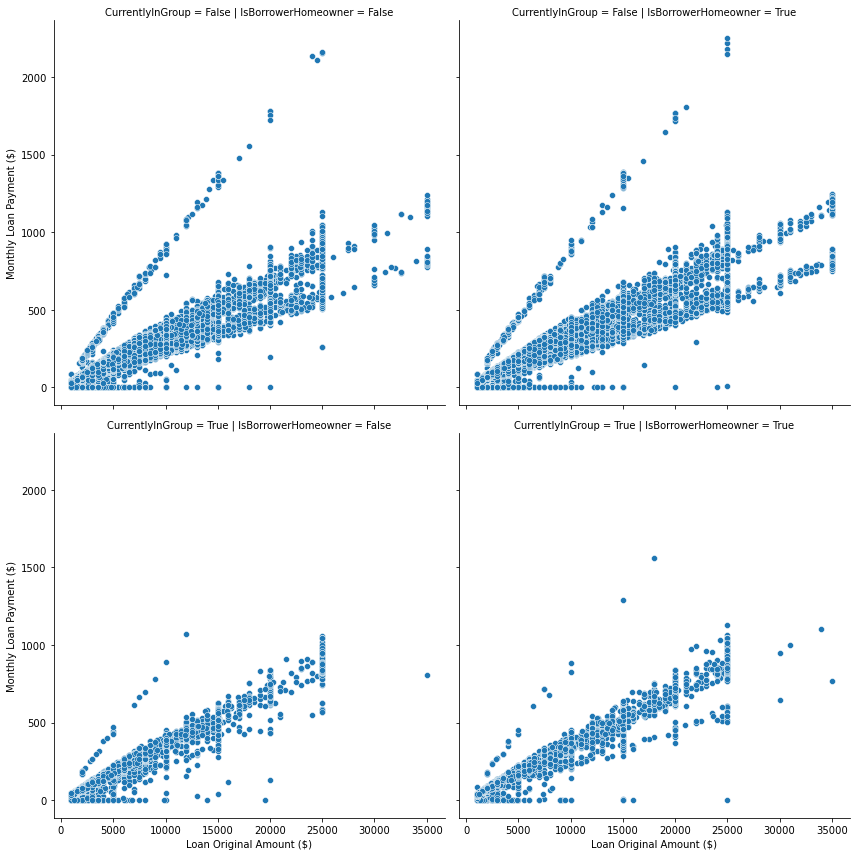

In [49]:
# multivariate plot of Loan Original Amount by monthly loan payment, currently in group and is borrower homeowner
g = sb.FacetGrid(data = loans_sub, col = 'IsBorrowerHomeowner', row= 'CurrentlyInGroup', height=6)
g.map(sb.scatterplot,'LoanOriginalAmount', 'MonthlyLoanPayment')
g.set_xlabels( 'Loan Original Amount ($)')
g.set_ylabels( 'Monthly Loan Payment ($)');

## Observation

> A lot of borrowers who take larger loans are mostly homeowners and not in a group. It appears those who are in groups only take a very insignificant number large loans. Could it be the influence of the group? 

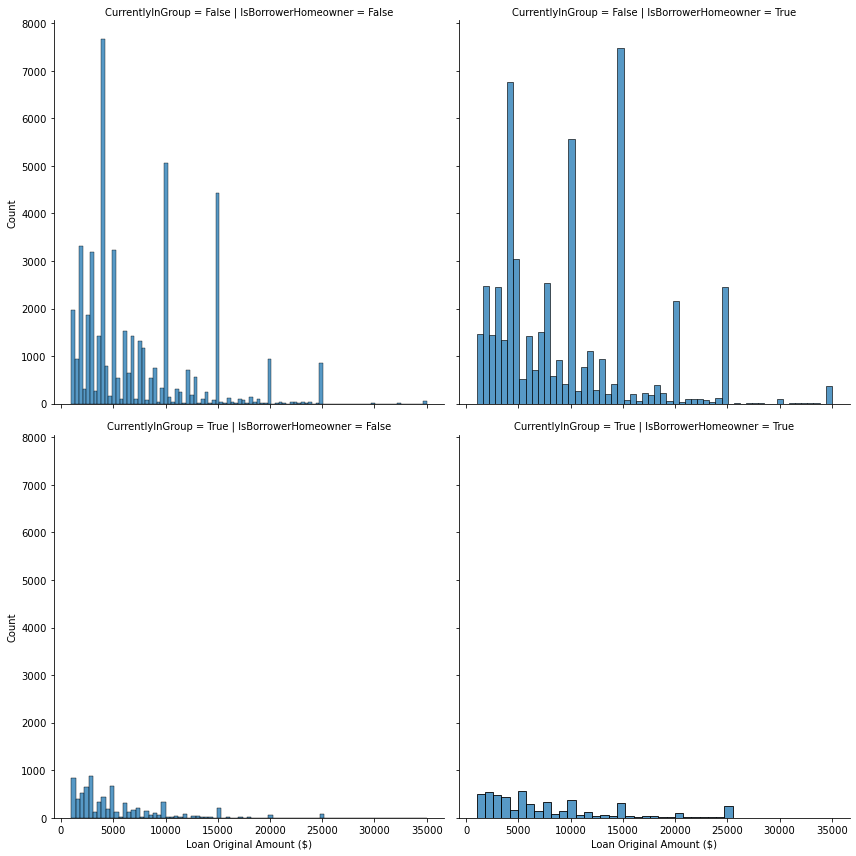

In [61]:
# multivariate plot of Loan Original Amount by IsBorrowerHomeowner and CurrentlyInGroup
g = sb.FacetGrid(data = loans_sub, col = 'IsBorrowerHomeowner', row= 'CurrentlyInGroup', height=6)
g.map_dataframe(sb.histplot, x='LoanOriginalAmount')
g.set_xlabels( 'Loan Original Amount ($)');

## Observation

> This plot confirms the previous finding about the impact of being in a group on the loan amount and the number of borrowers taking loans being in a group or not.

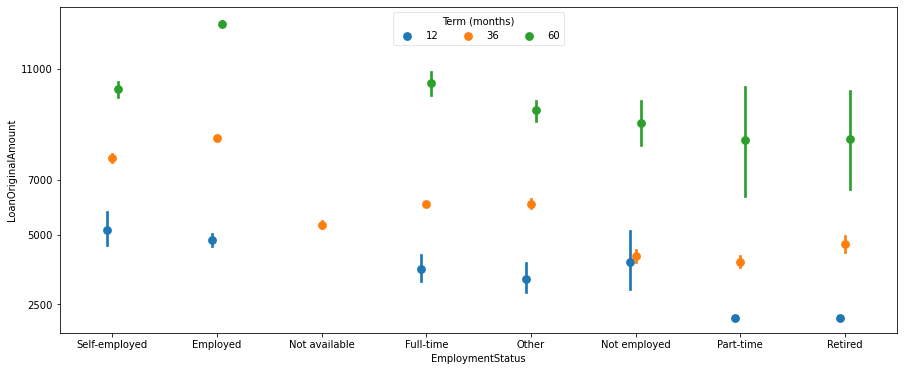

In [21]:
# Plotting of loan original amount vs. employment status and term
plt.figure(figsize=[15,6])
plt.yticks(ticks, labels);
ax= sb.pointplot(data=loans_sub, x='EmploymentStatus', y='LoanOriginalAmount', hue= 'Term', dodge=0.1, linestyles='')
ax.legend(loc = 9, framealpha = 0.5, ncol= 4, title='Term (months)');

## Observation

> Interestingly the longer the term the higher the amount of original amount. The employed have the highest loan amount of 60 months and 36 months while the self-employed have the highest loan amount for 12 months. The employed take the least number of loans for 60 month even though their loan size amount is the largest for same 60 months. Also the retired take more long term loan of 60 months, followed by the part-time and the not-employed employment status. The not-employed have the highest number of loans for 12months, followed by the self employed.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As the term increases from 12-36-60, so too does the amount given as loan to the borrowers. Interesting the prosper rating alpha stays true only for the term of 60 with the highest loan amount being for AA and the lowest for E. The loan status whether completed or current has a higher average loan original amount as the term increases. As earlier observed in the bivariate exploration and as seen here the unemployed has the highest average annual percentage rate for all the terms of 12, 36 and 60 months. The lowest average interest rate for the term of 12 and 60 months are the retired, while for the lowest for 36 months are the unknown and unavailable employment status.
The Borrower annual percentage rate is usually around the 0.1 to 0.2 range for larger loans above 25000 dollars and a larger proportion of those borrowers are homeowners.
### Were there any interesting or surprising interactions between features?

> The employed take the least number of loans for 60 month even though their loan size amount is the largest for same 60 months

> A lot of borrowers who take larger loans are mostly homeowners and not in a group. It appears those who are in groups only take a very insignificant number large loans. Could it be the influence of the group?